<a href="https://colab.research.google.com/github/balachander1015/BR_ML_AI/blob/main/WEEK_23_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
retail_df=pd.read_csv('/content/retail_data.csv')

In [5]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,01-12-2010 08:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,01-12-2010 08:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,01-12-2010 08:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,01-12-2010 08:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,01-12-2010 08:45,0.65,12583.0,France


In [6]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8557 entries, 0 to 8556
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    8557 non-null   object 
 1   StockCode    8557 non-null   object 
 2   Description  8557 non-null   object 
 3   Quantity     8557 non-null   int64  
 4   InvoiceDate  8557 non-null   object 
 5   UnitPrice    8557 non-null   float64
 6   CustomerID   8491 non-null   float64
 7   Country      8557 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 534.9+ KB


<Axes: xlabel='InvoiceDate', ylabel='Quantity'>

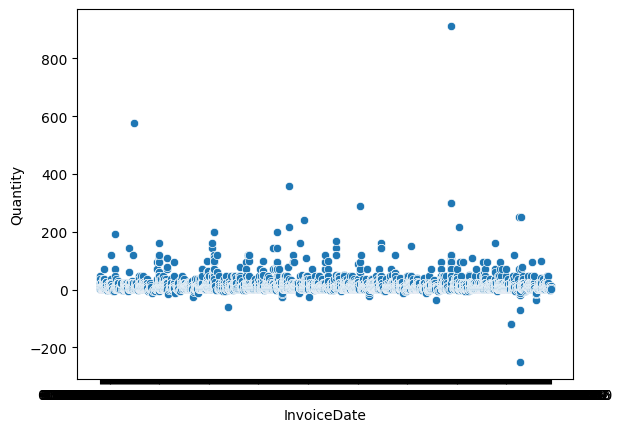

In [7]:
sns.scatterplot(x='InvoiceDate',y='Quantity',data=retail_df)

In [8]:
retail_df[retail_df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3467,556924,82552,WASHROOM METAL SIGN,1,15-06-2011 14:14,1.45,NaN,France
3468,556924,21165,BEWARE OF THE CAT METAL SIGN,1,15-06-2011 14:14,1.69,NaN,France
3469,556924,47503A,ASS FLORAL PRINT MULTI SCREWDRIVER,1,15-06-2011 14:14,1.25,NaN,France
3470,556924,23154,SET OF 4 JAM JAR MAGNETS,3,15-06-2011 14:14,2.08,NaN,France
3471,556924,23156,SET OF 5 MINI GROCERY MAGNETS,3,15-06-2011 14:14,2.08,NaN,France
...,...,...,...,...,...,...,...,...
7244,575759,22617,BAKING SET SPACEBOY DESIGN,1,11-11-2011 10:50,4.95,NaN,France
7245,575759,84836,ZINC METAL HEART DECORATION,24,11-11-2011 10:50,1.25,NaN,France
7246,575759,21811,HANGING HEART WITH BELL,48,11-11-2011 10:50,0.39,NaN,France
7247,575759,21822,GLITTER CHRISTMAS TREE WITH BELLS,12,11-11-2011 10:50,0.79,NaN,France


In [9]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format = "%d-%m-%Y %H:%M")

In [10]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France


In [11]:
retail_df = retail_df[retail_df['Quantity']>0]

In [12]:
retail_df['CustomerID'].fillna('Dummy',inplace=True)

/tmp/ipython-input-688011218.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  retail_df['CustomerID'].fillna('Dummy',inplace=True)
/tmp/ipython-input-688011218.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Dummy' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  retail_df['CustomerID'].fillna('Dummy',inplace=True)


In [13]:
retail_df['CustomerID'].isnull().sum()

np.int64(0)

In [14]:
ref_date=retail_df['InvoiceDate'].max()+pd.Timedelta(days=1)

In [15]:
rfm_df=retail_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (ref_date-x.max()).days,
                                            'InvoiceNo' : 'nunique',
                                            'Quantity' : lambda x:x.sum()
                                            })

In [16]:
rfm_df.head()

,InvoiceDate,InvoiceNo,Quantity
CustomerID,,,
12413.0,67,3,286
12437.0,2,18,2923
12441.0,367,1,121
12488.0,10,3,529
12489.0,336,1,105


In [17]:
monetary = retail_df.groupby(['CustomerID']).apply(lambda x:(x['Quantity']*x['UnitPrice']).sum())

/tmp/ipython-input-2043467588.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monetary = retail_df.groupby(['CustomerID']).apply(lambda x:(x['Quantity']*x['UnitPrice']).sum())


In [18]:
monetary.head()

,0
CustomerID,
12413.0,758.10
12437.0,4951.41
12441.0,173.55
12488.0,1298.66
12489.0,334.93


In [19]:
rfm_df['Monetary']=monetary

In [20]:
rfm_df.head()

,InvoiceDate,InvoiceNo,Quantity,Monetary
CustomerID,,,,
12413.0,67,3,286,758.10
12437.0,2,18,2923,4951.41
12441.0,367,1,121,173.55
12488.0,10,3,529,1298.66
12489.0,336,1,105,334.93


In [21]:
rfm_df.drop(columns=['Quantity'],inplace=True)

In [22]:
rfm_df.head()

,InvoiceDate,InvoiceNo,Monetary
CustomerID,,,
12413.0,67,3,758.10
12437.0,2,18,4951.41
12441.0,367,1,173.55
12488.0,10,3,1298.66
12489.0,336,1,334.93


<Axes: >

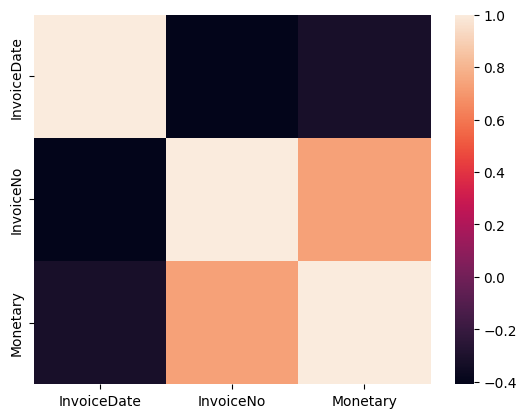

In [23]:
sns.heatmap(rfm_df.corr())

In [63]:
rfm_df.columns = ['Recency','Frequency','Monetary']

In [64]:
rfm_transformed = rfm_df.copy()
for cols in rfm_df.columns:
  rfm_transformed[f'log_{cols}'] = np.log1p(rfm_transformed[cols])

In [65]:
rfm_transformed.head()

,Recency,Frequency,Monetary,log_Recency,log_Frequency,log_Monetary
CustomerID,,,,,,
12413.0,67,3,758.10,4.219508,1.386294,6.632134
12437.0,2,18,4951.41,1.098612,2.944439,8.507630
12441.0,367,1,173.55,5.908083,0.693147,5.162211
12488.0,10,3,1298.66,2.397895,1.386294,7.169858
12489.0,336,1,334.93,5.820083,0.693147,5.816903


In [66]:
rfm_transformed.drop(columns=['Recency','Frequency','Monetary'], inplace=True)

In [67]:
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()
rfm_transformed = standardscaler.fit_transform(rfm_transformed)
X = rfm_transformed
rfm_transformed = pd.DataFrame(rfm_transformed)

In [68]:
rfm_transformed

,0,1,2
0,0.406563,-0.055697,-0.208964
1,-1.821145,2.207373,1.216103
2,1.611875,-1.062433,-1.325861
3,-0.893712,-0.055697,0.199618
4,1.549060,-1.062433,-0.828404
...,...,...,...
83,1.503133,-0.473530,-0.187771
84,1.542677,-1.062433,-1.099906
85,0.374356,-1.062433,-0.643292
86,-0.626254,-0.055697,1.093995


In [69]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [71]:
inertia=[]
sills=[]
k_range= range(3,10)

for k in k_range:
  km = KMeans(n_clusters=k, random_state=46)
  labels_k = km.fit_predict(X)
  inertia.append(km.inertia_)
  sills.append(silhouette_score(X,labels_k))

In [72]:
inertia

[81.91535384151955,
 67.03490236488913,
 57.4049566833602,
 44.350872201134564,
 38.95673466787101,
 35.48176534252232,
 31.443912069042536]

In [73]:
sills

[np.float64(0.35075943172961904),
 np.float64(0.2968322683508491),
 np.float64(0.3096334177407131),
 np.float64(0.33645410982719337),
 np.float64(0.3433382010163453),
 np.float64(0.31444093008190294),
 np.float64(0.31701765045045693)]

In [74]:
list(k_range)

[3, 4, 5, 6, 7, 8, 9]

<Axes: title={'center': 'Elbow method of K-Means'}>

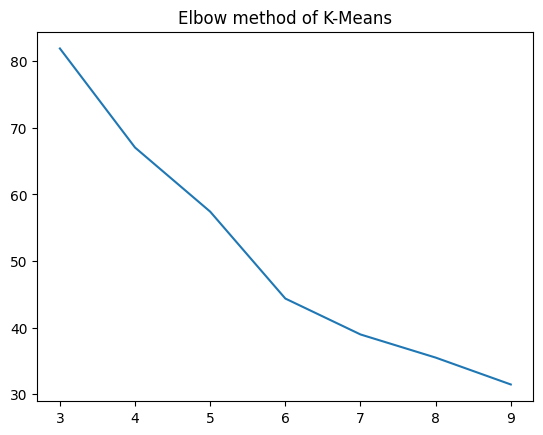

In [75]:
plt.title('Elbow method of K-Means')
sns.lineplot(x=list(k_range), y=inertia)

<Axes: title={'center': 'Sillhouette vs K-Means'}>

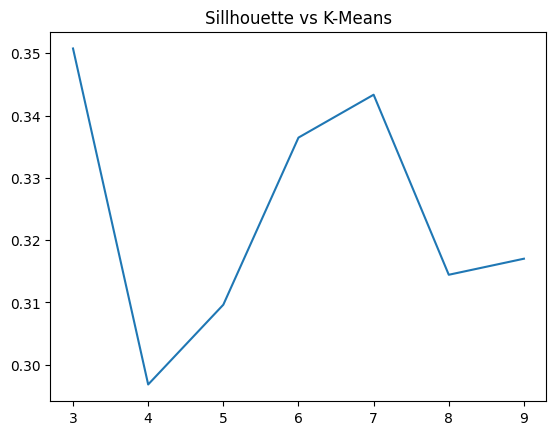

In [76]:
plt.title('Sillhouette vs K-Means')
sns.lineplot(x=list(k_range), y=sills)

In [57]:
k_range[int(np.argmax(sills))]

3

In [85]:
k_final = 3 #Best value of K

In [86]:
km_final = KMeans(n_clusters=k_final, random_state=46)
rfm_transformed['KM Label'] = km_final.fit_predict(X)

km_sil = silhouette_score(X,rfm_transformed['KM Label'])
km_sil

np.float64(0.35075943172961904)

In [156]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=k_final, linkage='average', metric='euclidean')
rfm_transformed['AGG Label'] = agg.fit_predict(X)

In [157]:
agg_sil = silhouette_score(X, rfm_transformed['AGG Label'])
agg_sil

np.float64(0.39727483087407656)

In [145]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=46)
X2 = pca.fit_transform(X)

In [146]:
X2.shape

(88, 2)

<Axes: >

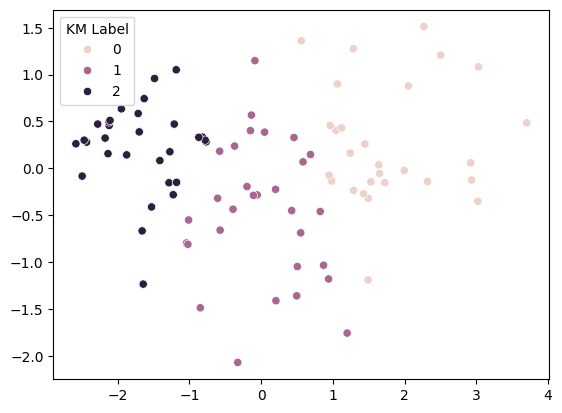

In [147]:
sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=rfm_transformed['KM Label'])

<Axes: >

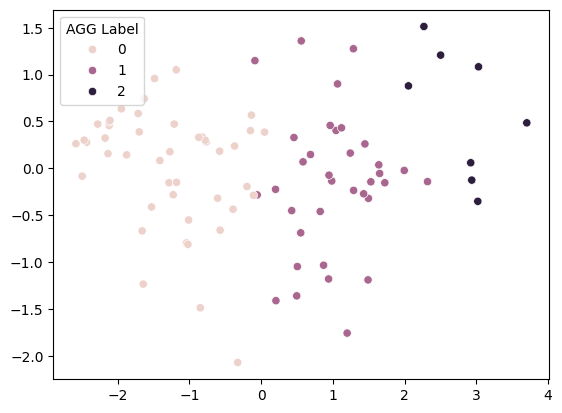

In [158]:
sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=rfm_transformed['AGG Label'])

In [131]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8408 entries, 0 to 8556
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    8408 non-null   object        
 1   StockCode    8408 non-null   object        
 2   Description  8408 non-null   object        
 3   Quantity     8408 non-null   int64         
 4   InvoiceDate  8408 non-null   datetime64[ns]
 5   UnitPrice    8408 non-null   float64       
 6   CustomerID   8408 non-null   object        
 7   Country      8408 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 849.2+ KB


In [141]:
retail_df['InvoiceDate'] = retail_df['InvoiceDate'].astype('object')

In [142]:
X2=pca.fit_transform(retail_df)

ValueError: could not convert string to float: 'POST'